In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers.core import Dense
from keras.utils import np_utils

print("Imported")

Imported


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
test = pd.read_csv("data/test.csv")

In [6]:
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [7]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
no_classes = 10

y_train = np_utils.to_categorical(y_train, no_classes)
y_test = np_utils.to_categorical(y_test, no_classes)

In [9]:
model = Sequential();

model.add(Dense(512, input_shape=(784,), activation='relu'));

model.add(Dense(512, activation='relu'));

model.add(Dense(512, activation="relu"))

model.add(Dense(10, activation='softmax'));

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# plot_model(model, show_shapes=True, show_layer_names=True, show_layer_activations=True, to_file='model.png')
# from IPython.display import Image

# Image("model.png")

In [13]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.2099 - accuracy: 0.9368
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0810 - accuracy: 0.9750
Epoch 3/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0543 - accuracy: 0.9833
Epoch 4/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0387 - accuracy: 0.9875
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.0320 - accuracy: 0.9893
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0225 - accuracy: 0.9924
Epoch 8/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 9/20
469/469 [==============================] - 9s 20ms/step - loss: 0.0204 - accuracy: 0.9937
Epoch 10/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0167 - 

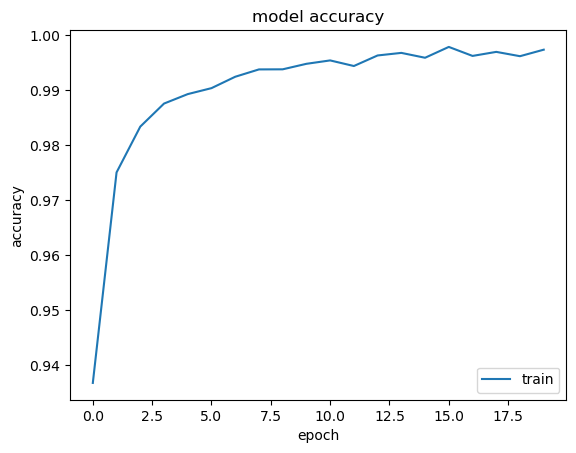

In [14]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="lower right")

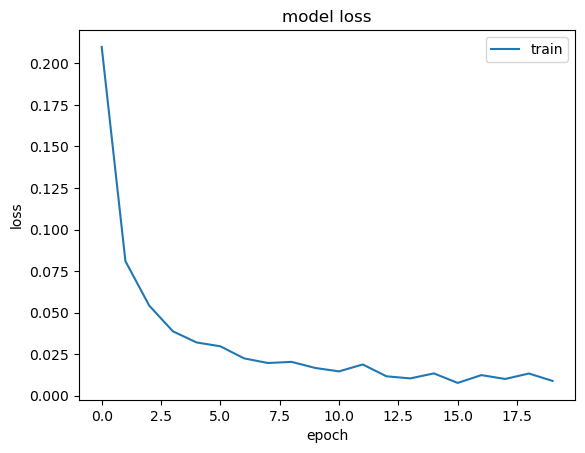

In [15]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1216 - accuracy: 0.9783


[0.12163420766592026, 0.9782999753952026]

In [17]:
results = model.predict(test)

875/875 [==============================] - 4s 5ms/step


In [18]:
results = np.argmax(results, axis=1)
results = pd.Series(results, name="Label")
submission = pd.concat([pd.Series(range(1, 28001), name="ImageId"), results], axis=1)

submission.to_csv("submission.csv", index=False)

In [19]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
